In [262]:
#Chargement des librairies Pandas, Network et folium
import pandas as pd 
import networkx as nx 
import matplotlib.pyplot as plt 
import csv 
import folium

%matplotlib inline

""" PARTIE 1 NETWORKX AND FOLIUM SECTIONS """
print("<---------------->BIENVENUE DANS NOTRE PROJET DE DECOUVERTE ET D'INITIALISATION\n EN PYTHON POUR L'ANALYSE DE DONNEES AVEC DES LIBRAIRIES COMME PANDAS, FOLIUM, NETWORKX, MATPLOTLIB et CSV\nVOUS POUVEZ EXECUTER TOUTES LES CELLULES D'UN COUP!<-------------->\n")

print("<---------------->Bibliothéque pandas pour lire le fichier transport-nodes.csv<-------------->\n")
print(pd.read_csv("transport-nodes.csv", sep=","), "\n")
print("<---------------->Bibliothéque pandas pour lire le fichier transport-relationships.csv<-------------->\n")
print(pd.read_csv("transport-relationships.csv", sep=","), "\n")

input_data_nodes = pd.read_csv('transport-nodes.csv', sep=",")
input_data_edges = pd.read_csv('transport-relationships.csv', sep=",")
# Setting id index on transport-nodes file and transforming datas into DataFrames format
input_data_nodes = input_data_nodes.set_index("id")
data_nodes = pd.DataFrame(input_data_nodes)
data_edges = pd.DataFrame(input_data_edges)

# Building a graph from data edges list with networkx
edge_Graph = nx.from_pandas_edgelist(df=data_edges, source="src", edge_attr=True, target="dst")
myGraph = nx.Graph(edge_Graph)

# Adding latitude, longitude and population attributes on the nodes
def ajouterAttribut(graph, nameAttribute, dfNode, index):
    nx.set_node_attributes(graph, name=nameAttribute, values=dfNode[nameAttribute])

ajouterAttribut(graph=myGraph,nameAttribute="latitude", dfNode=data_nodes, index="id")
ajouterAttribut(graph=myGraph,nameAttribute="longitude", dfNode=data_nodes, index="id")
ajouterAttribut(graph=myGraph,nameAttribute="population", dfNode=data_nodes, index="id")
print("<--------------->Affichage des noeuds et de leurs attributs sous forme de dictionnaire<--------------->\n")
print(dict(myGraph.nodes.data()), "\n")

# Making a map for each node's longitude and latitude 
for i in myGraph.nodes:
    basemap = folium.Map(location=[myGraph.nodes[i]['latitude'], myGraph.nodes[i]['longitude']], zoom_start=7, tiles="Stamen Terrain")
basemap

# Putting icon markers in the map 
def marker(g):
    tooltip = "Click me!"
    for i in g.nodes:
        folium.Marker(
            location=[g.nodes[i]['latitude'], g.nodes[i]['longitude']], popup="<b>"+i+"</b>", tooltip=tooltip, icon = folium.Icon(color="red", icon="fa-map-marker",prefix="fa")
        ).add_to(basemap)
    return basemap
marker(myGraph)

# A list of points from each node's attribute and one of its neighbors
def construirePointsImage(graph):
    points = []
    for i in graph.nodes:
        for neighbor in graph.neighbors(i):
            points.append([graph.nodes[i]['latitude'], graph.nodes[i]['longitude']])
            points.append([graph.nodes[neighbor]['latitude'], graph.nodes[neighbor]['longitude']])
    return points

coordonneesvoisins = construirePointsImage(myGraph)
print("<--------------->Coordonnées des noeuds et de leurs voisins<-----------------> \n\n",coordonneesvoisins, "\n")

# Visualizing the map with PolyLines from the list of points

print("<--------------->Visualisation de la carte avec les marqueurs et les arcs<--------------->")
def visualiserFolium(graph, points, locationpardefaut=[51.509865, -0.118092], tiles="Stamen Toner", explored=None):
    folium.PolyLine(locations=points, color="red", weight=2.5, opacity=1).add_to(basemap)
    basemap.save("mapMarker.html")
    return basemap

visualiserFolium(myGraph, coordonneesvoisins)

<---------------->BIENVENUE DANS NOTRE PROJET DE DECOUVERTE ET D'INITIALISATION
 EN PYTHON POUR L'ANALYSE DE DONNEES AVEC DES LIBRAIRIES COMME PANDAS, FOLIUM, NETWORKX, MATPLOTLIB et CSV
VOUS POUVEZ EXECUTER TOUTES LES CELLULES D'UN COUP!<-------------->

<---------------->Bibliothéque pandas pour lire le fichier transport-nodes.csv<-------------->

                  id   latitude  longitude  population
0          Amsterdam  52.379189   4.899431      821752
1            Utrecht  52.092876   5.104480      334176
2          Rotterdam  51.922500   4.479170      623652
3           Den Haag  52.078663   4.288788      514861
4          Immingham  53.612390  -0.222190        9642
5          Doncaster  53.522850  -1.131160      302400
6             London  51.509865  -0.118092     8787892
7   Hoek van Holland  51.977500   4.133330        9382
8         Felixstowe  51.963750   1.351100       23689
9         Colchester  51.889210   0.904210      104390
10           Ipswich  52.059170   1.155450 

<--------------->Visualisation du Graphe<--------------->


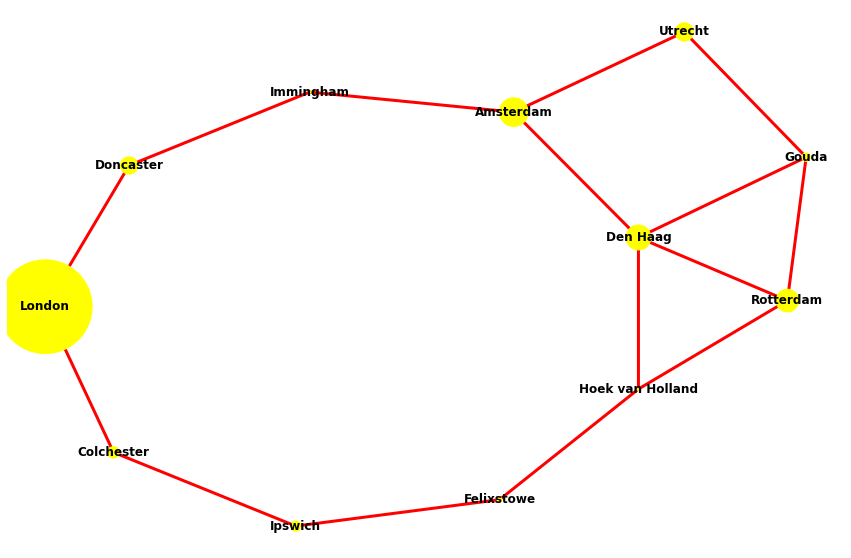

In [263]:
print("<--------------->Visualisation du Graphe<--------------->")
# And array of node sizes according to the population's attribute
nodes_size = []
for i in data_nodes.population:
    nodes_size.append(int(i/1000))
fig, ax = plt.subplots(figsize=(15,10))
# Drawing the graph
nx.draw_kamada_kawai(G=myGraph, with_labels=True ,node_size=nodes_size,node_color='yellow', font_weight="bold", edge_color="Red", width=3)

In [264]:
'''PARTIE 2: implémentation des ADT: Noeud, Graphe, File, Pile

Implementer la classe Noeud '''
print("<------------------->PARTIE 2: implémentation des ADT: Noeud, Graphe, File, Pile\nPour une meilleure visualisation des resultats veuillez executer les fonction une par une<----------------->\n")
print("<------------------->Liste des arcs du graphe<----------------->\n")

class Noeud:
    def __init__(self,name):
        self.name=name
        self.attributs={}
        self.listeNomVoisin=[]

    def setAttribut(self,key,values):
        self.attributs[key]=values
    
    def getAttribut(self,key):
        return self.attributs[key]
    
    def getName(self):
        return self.name
    
    def egal(self,noeud):
        return self.name==noeud.name
    '''Retourne le cout minimum entre un noeud et ses voisins'''
    def getCoutMin(self):
        listeCout = []
        cost= []
        # Lecture du fichier csv
        try :
            with open("transport-relationships.csv", "r") as listeArc:
                contenuFichier = csv.reader(listeArc)
                for line in contenuFichier:
                    if line[0] == self.name or line[1] == self.name:
                        listeCout.append(line[3])
                for i in range(len(listeCout)):
                    cost.append(int(listeCout[i]))
                return min(cost)
        except FileNotFoundError:
            print("Le fichier n'a pas été trouvé")

    '''Retourne le cout entre un noeud et un de ses voisins'''    
    def getCout(self, noeud):
        try:
            with open("transport-relationships.csv", "r") as listeArc:
                reader = csv.reader(listeArc, delimiter=",")
                for row in reader:
                    if row[0]==self.name and row[1]==noeud.getName():
                        return row[3]
                    elif row[1]==self.name and row[0]==noeud.getName():
                        return row[3]
        except FileNotFoundError:
            print("Le fichier n'a pas été trouvé")
    
'''Implementation la classe Graphe'''
class Graphe:
    
    def __init__(self):
        self.noeuds=[]
        self.arcs={}
    
    ''' Création des noeuds avec un fichier csv '''
    def creerNoeuds(self, fichierNoeuds):
        try:
            with open( fichierNoeuds, "r") as listeNoeuds:        
                contenuFichier = csv.reader(listeNoeuds) 
                i = 0
                for line in contenuFichier:
                    '''
                    La condition suivante est pour esquiver la lecture de la première ligne du fichier
                    qui correspond à l'en-tete
                    '''
                    if line[0] != 'id':
                        # Ajout du nom du noeud de chaque ligne à la liste des noeuds
                        # Puis ajouter ses attributs
                        noeud = Noeud(line[0])
                        self.noeuds.append(noeud)

                        self.noeuds[i].setAttribut("latitude", line[1])
                        self.noeuds[i].setAttribut("longitude", line[2])
                        self.noeuds[i].setAttribut("population", line[3])
                        i += 1
                    
            for noeud in self.noeuds:
                print(noeud.getName())
        except FileNotFoundError:
            print("Le fichier n'a pas été trouvé")
    
    '''   Création les arcs avec un  fichier csv '''
    def creerArc(self, fichierArc):
        arc = []
        try:
            with open( fichierArc, "r") as listeArc:    
                contenuFichier = csv.reader(listeArc) 
                i = 0
                for line in contenuFichier:
                    if line[0] != 'src':
                        arc.append({'src': line[0],
                                        'dst': line[1],
                                        'relationship': line[2],
                                        'cost': line[3]
                                    }
                                  ) 
                        self.arcs = arc               
                        # Ajout des voisins de chaque noeud sur sa liste de voisinage
                        noeudSourceName = line[0]
                        noeudDestinationName = line[1]
                        for noeud in self.noeuds:
                            # Gestion du voisinage dans le sens premier 
                            if noeud.getName() == noeudSourceName:
                                noeud.listeNomVoisin.append((line[1], line[3]))
                                print(noeud.listeNomVoisin)                        
                            # Gestion du voisinage dans le sens inverse
                            if noeud.getName() == noeudDestinationName:
                                noeud.listeNomVoisin.append((line[0], line[3]))
                                print(noeud.listeNomVoisin)
                        i += 1
                for ligne in self.arcs:
                    print(ligne)
        except FileNotFoundError:
            print("Le fichier n'a pas été trouvé")
    
    '''  Retrouver un noeud à partir de son nom '''
    def getNoeud(self,nom):
        for noeud in self.noeuds:
            if noeud.getName()==nom:
                return noeud
        raise Exception("Le noeud n'existe pas")
    
    '''   Trouver les noeuds voisins d'un noeud donne   '''
    def getVoisins(self, noeud):
        listeNoeudVoisins = []
        for noeudCourant in self.noeuds:
            if noeudCourant.egal(noeud):
                for noeudVoisin in noeudCourant.listeNomVoisin:
                    listeNoeudVoisins.append(noeudVoisin[0])
        return listeNoeudVoisins
    
    '''   Recuperer pour un noeud donne les latitudes et longitudes de ses voisins  '''
    def getCoordonnesVoisins(self,noeud):
        coordonneesvoisins=[]
        for voisin in self.getVoisins(noeud):
            coordonneesvoisins.append(
                [
                    (self.getNoeud(voisin).getAttribut("latitude"),self.getNoeud(voisin).getAttribut("longitude"))
                ]
            )
            
        return coordonneesvoisins
    
    '''   Recuperer les coordonnees d'une liste de noeuds pour visualiser sous folium   '''
    def getListeCoordonnees(self,listeNoeuds):
        coordonnees=[]
        for noeud in listeNoeuds:
            coordonnees.append([(self.getNoeud(noeud).getAttribut("latitude"),self.getNoeud(noeud).getAttribut("longitude"))])
        return coordonnees
    
    '''   Visualiser les noeuds et les arcs sous folium  '''
    def visualiserFolium(self,locationpardefaut=[52.3791890,4.899431],tiles='Stamen Toner',explored=None):
        '''   Visualise le graphe en folium   '''
        m=folium.Map(location=locationpardefaut,tiles=tiles, zoom_start=7)
        # On recupere les noeuds a partir de l'index 1 car l'index 0 est reservé pour l'id 
        for noeud in self.noeuds[1:]:
            if explored is not None:
                if noeud.getName() in explored:
                    folium.Marker(
                        location=[noeud.getAttribut("latitude"), noeud.getAttribut("longitude")],
                        popup=noeud.getName(),
                        icon=folium.Icon(color='green')
                    ).add_to(m)
                else:
                    folium.Marker(
                        location=[noeud.getAttribut("latitude"), noeud.getAttribut("longitude")],
                        popup=noeud.getName(),
                        icon=folium.Icon(color='red')
                    ).add_to(m)
            else:
                folium.Marker(
                    location=[noeud.getAttribut("latitude"), noeud.getAttribut("longitude")],
                    popup=noeud.getName(),
                    icon=folium.Icon(color='red')
                ).add_to(m)
        folium.PolyLine(locations=coordonneesvoisins, color="red", weight=2.5, opacity=1).add_to(m)
        m.save('mapMarkerExplored.html')
        return m

G=Graphe()
G.creerNoeuds("transport-nodes.csv")
G.creerArc("transport-relationships.csv")
print("<------------------->Visualisation du graphe avec les arcs en rouge via folium<----------------->\n")
G.visualiserFolium()

<------------------->PARTIE 2: implémentation des ADT: Noeud, Graphe, File, Pile
Pour une meilleure visualisation des resultats veuillez executer les fonction une par une<----------------->

<------------------->Liste des arcs du graphe<----------------->

Amsterdam
Utrecht
Rotterdam
Den Haag
Immingham
Doncaster
London
Hoek van Holland
Felixstowe
Colchester
Ipswich
Gouda
[('Utrecht', '46')]
[('Amsterdam', '46')]
[('Utrecht', '46'), ('Den Haag', '59')]
[('Amsterdam', '59')]
[('Den Haag', '26')]
[('Amsterdam', '59'), ('Rotterdam', '26')]
[('Utrecht', '46'), ('Den Haag', '59'), ('Immingham', '369')]
[('Amsterdam', '369')]
[('Amsterdam', '369'), ('Doncaster', '74')]
[('Immingham', '74')]
[('Immingham', '74'), ('London', '277')]
[('Doncaster', '277')]
[('Amsterdam', '59'), ('Rotterdam', '26'), ('Hoek van Holland', '27')]
[('Den Haag', '27')]
[('Den Haag', '27'), ('Felixstowe', '207')]
[('Hoek van Holland', '207')]
[('Hoek van Holland', '207'), ('Ipswich', '22')]
[('Felixstowe', '22')]
[('Ip

In [265]:
print("<------------------->Liste des noeuds du graphe<----------------->\n")
G.creerNoeuds("transport-nodes.csv")

<------------------->Liste des noeuds du graphe<----------------->

Amsterdam
Utrecht
Rotterdam
Den Haag
Immingham
Doncaster
London
Hoek van Holland
Felixstowe
Colchester
Ipswich
Gouda
Amsterdam
Utrecht
Rotterdam
Den Haag
Immingham
Doncaster
London
Hoek van Holland
Felixstowe
Colchester
Ipswich
Gouda


In [266]:
print("<------------------->Liste des coordonnees des noeuds de la liste<----------------->\n")
print(G.getListeCoordonnees(["London","Gouda"]))

<------------------->Liste des coordonnees des noeuds de la liste<----------------->

[[('51.509865', '-0.118092')], [('52.01667', '4.70833')]]


In [267]:
print("<------------------->Liste des voisins de Amsterdam<----------------->\n")
print(G.getVoisins(G.getNoeud("Amsterdam")))

<------------------->Liste des voisins de Amsterdam<----------------->

['Utrecht', 'Den Haag', 'Immingham']


In [268]:
print("<------------------->Cout minimum entre un noeud(Amsterdam) et ses voisins<----------------->\n")
node = G.getNoeud("Amsterdam")
print(node.getCoutMin(), "\n")
print("<------------------->Cout entre un noeud(Immingham) et un de ses voisins(Amsterdam)<----------------->\n")
print(G.getNoeud("Immingham").getCout(G.getNoeud("Amsterdam")),"\n")

<------------------->Cout minimum entre un noeud(Amsterdam) et ses voisins<----------------->

46 

<------------------->Cout entre un noeud(Immingham) et un de ses voisins(Amsterdam)<----------------->

369 



In [269]:
print("<------------------->Liste des coordonnees des voisins de Amsterdam<----------------->\n")
print(G.getCoordonnesVoisins(G.getNoeud("Amsterdam")))

<------------------->Liste des coordonnees des voisins de Amsterdam<----------------->

[[('52.092876', '5.104480')], [('52.078663', '4.288788')], [('53.61239', '-0.22219')]]


In [270]:
'''
Partie 3 : Implementer les classes File et Pile en utilisant les listes en python
'''
class Pile:
    def __init__(self):
        self.elements=[]

    def push(self,element):
        self.elements.append(element)
    
    '''   Retourne True si  un noeud est dans la pile   '''
    def contains_noeud(self,noeud):
        return noeud in self.elements
        
    '''   Retourne true si la pile est vide   '''
    def empty(self):
        return len(self.elements)==0

    '''   Retourne et supprime le dernier element de la pile   
         Retourne une exception si la pile est vide   '''
    def remove(self):
        if len(self.elements) == 0:
            raise Exception("La pile est vide")
        return self.elements.pop()

#Implémentation de la classe File par héritage
class File(Pile):
    def __init__(self):
        super().__init__()
    '''
    Retourne et supprime le premier element de la file
    '''
    def remove(self):
        if self.empty():
            raise Exception("La file est vide")
        return self.elements.pop(0)

print("<------------------>Test des structures de données Pile et File<------------------->\n")
f=Pile()
f.push("Mamadou")
f.push("Mansour")
f.push("Dame")
f.push("Khady")
print(f.elements)
print("<----------------->L'élément recemmenet ajouté de la liste sera enlevé<----------------->\n")
f.remove()
print(f.elements)
p=File()
p.push("Mamadou")
p.push("Mansour")
p.push("Dame")
p.push("Khady")
print(p.elements)
print("<---------------->Le premier élément de la liste sera enlevé<---------------->\n")
p.remove()
print(p.elements)

<------------------>Test des structures de données Pile et File<------------------->

['Mamadou', 'Mansour', 'Dame', 'Khady']
<----------------->L'élément recemmenet ajouté de la liste sera enlevé<----------------->

['Mamadou', 'Mansour', 'Dame']
['Mamadou', 'Mansour', 'Dame', 'Khady']
<---------------->Le premier élément de la liste sera enlevé<---------------->

['Mansour', 'Dame', 'Khady']


In [271]:
''' PARTIE 4 : Parcours en profondeur iteratif d'un graphe entre un noeudSRC et un noeudDST '''
def parcoursDFS(graphe, noeudSRC, noeudDST):
    frontiere = Pile()
    listeNoeudVisite = File()

    frontiere.push(noeudSRC)
    if noeudSRC == noeudDST:
        return [noeudSRC]
    tailleFrontiere = len(frontiere.elements)
    noeudCourant = frontiere.elements[tailleFrontiere - 1]

    dernierNoeudVisite = noeudCourant

    while noeudCourant != noeudDST:
        extractNoeud = frontiere.remove()
        # Récupèration des noeuds voisins de cet noeud qu'on vient d'extraire
        noeud = Noeud(extractNoeud)
        listeVoisins = graphe.getVoisins(graphe.getNoeud(extractNoeud))
        #----------------
        listeNoeudVisite.push(extractNoeud)
        for noeud in listeVoisins:
            if (frontiere.contains_noeud(noeud) == False) and (listeNoeudVisite.contains_noeud(noeud) == False):
                frontiere.push(noeud)
        tailleFrontiere = len(frontiere.elements)
        noeudCourant = frontiere.elements[tailleFrontiere - 1] 
        dernierNoeudVisite = noeudCourant
    '''     Aprés avoir sortie la boucle on doit ajouter le dernier visité
            à la liste des noeuds visités car cet ajout ne s'effectue pas avec la
            boucle While
    '''
    listeNoeudVisite.push(dernierNoeudVisite) 
    return listeNoeudVisite.elements
print("<------------------->Parcours en profondeur entre deux noeuds (London et Gouda)<----------------->\n")
parcoursDFS(G, "London", "Gouda")

<------------------->Parcours en profondeur entre deux noeuds (London et Gouda)<----------------->



['London',
 'Colchester',
 'Ipswich',
 'Felixstowe',
 'Hoek van Holland',
 'Rotterdam',
 'Gouda']

In [272]:
G = Graphe()
G.creerNoeuds("transport-nodes.csv")
G.creerArc("transport-relationships.csv")
print("<------------------->Visualisation de la carte avec marqueur en vert des noeuds parcourus entre un noeud Source et un noeud Destinataire<----------------->\n")
G.visualiserFolium(explored=list(parcoursDFS(G, 'London', 'Gouda' )))

Amsterdam
Utrecht
Rotterdam
Den Haag
Immingham
Doncaster
London
Hoek van Holland
Felixstowe
Colchester
Ipswich
Gouda
[('Utrecht', '46')]
[('Amsterdam', '46')]
[('Utrecht', '46'), ('Den Haag', '59')]
[('Amsterdam', '59')]
[('Den Haag', '26')]
[('Amsterdam', '59'), ('Rotterdam', '26')]
[('Utrecht', '46'), ('Den Haag', '59'), ('Immingham', '369')]
[('Amsterdam', '369')]
[('Amsterdam', '369'), ('Doncaster', '74')]
[('Immingham', '74')]
[('Immingham', '74'), ('London', '277')]
[('Doncaster', '277')]
[('Amsterdam', '59'), ('Rotterdam', '26'), ('Hoek van Holland', '27')]
[('Den Haag', '27')]
[('Den Haag', '27'), ('Felixstowe', '207')]
[('Hoek van Holland', '207')]
[('Hoek van Holland', '207'), ('Ipswich', '22')]
[('Felixstowe', '22')]
[('Ipswich', '32')]
[('Felixstowe', '22'), ('Colchester', '32')]
[('Doncaster', '277'), ('Colchester', '106')]
[('Ipswich', '32'), ('London', '106')]
[('Den Haag', '26'), ('Gouda', '25')]
[('Rotterdam', '25')]
[('Amsterdam', '46'), ('Gouda', '35')]
[('Rotterdam'